In [4]:
import pandas as pd

# Sample data
data = {'Username': ['user1', 'user2', 'user3'],
        'Tweet': ['Hello, Twitter!', 'Learning data analysis with Pandas.', 'Excited about my first project!'],
        'Likes': [10, 25, 5]}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df



,Username,Tweet,Likes
0,user1,"Hello, Twitter!",10
1,user2,Learning data analysis with Pandas.,25
2,user3,Excited about my first project!,5


In [5]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate sample data
categories = ['Technology', 'Fitness', 'Food', 'Travel', 'Music']
num_tweets = 1000

data = {
    'category': [random.choice(categories) for _ in range(num_tweets)],
    'likes': np.random.randint(1, 1000, num_tweets),
    'retweets': np.random.randint(1, 500, num_tweets),
    'date': [datetime.now() - timedelta(days=random.randint(1, 30)) for _ in range(num_tweets)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()


,category,likes,retweets,date
0,Technology,865,73,2023-10-20 11:18:46.041707
1,Fitness,393,366,2023-11-05 11:18:46.041707
2,Travel,727,192,2023-11-08 11:18:46.041707
3,Music,630,474,2023-11-16 11:18:46.041707
4,Travel,816,331,2023-10-22 11:18:46.041707


In [6]:
# Data Exploration
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  1000 non-null   object        
 1   likes     1000 non-null   int32         
 2   retweets  1000 non-null   int32         
 3   date      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 23.6+ KB
None

Missing Values:
category    0
likes       0
retweets    0
date        0
dtype: int64

Summary Statistics:
             likes     retweets                           date
count  1000.000000  1000.000000                           1000
mean    496.617000   244.712000  2023-11-02 00:32:12.444140288
min       5.000000     1.000000     2023-10-18 11:18:46.041707
25%     240.000000   120.000000  2023-10-25 11:18:46.043703040
50%     487.000000   237.000000  2023-11-01 11:18:46.045916928
75%     751.250000   369.250000  2023-11-09 11:18:46.044707

In [24]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print(missing_values)


category       0
likes          0
retweets       0
date           0
day_of_week    0
hour           0
dtype: int64


In [25]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)


Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [category, likes, retweets, date, day_of_week, hour]
Index: []


In [26]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


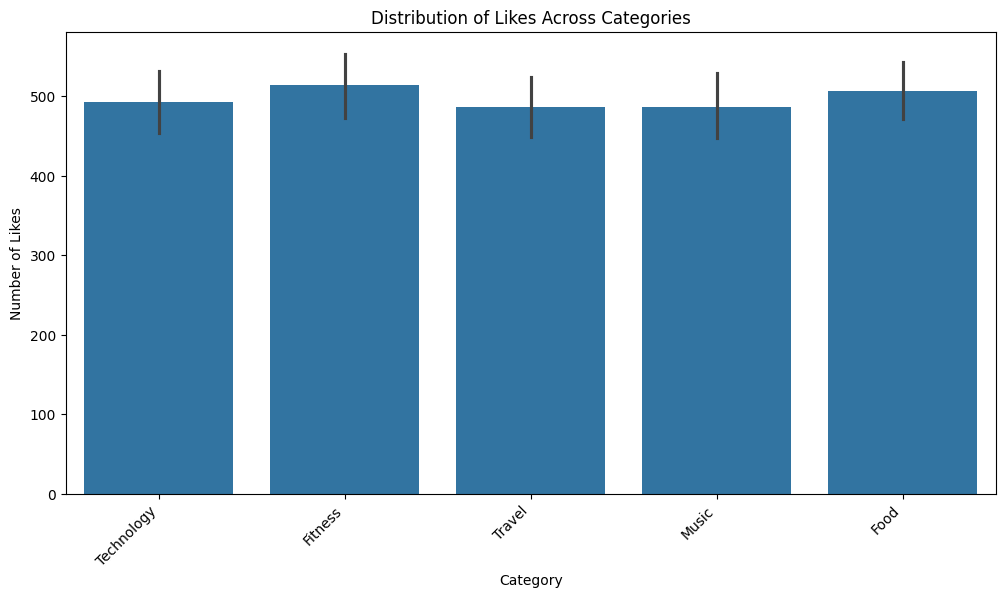

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='likes', data=df)
plt.title('Distribution of Likes Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.show()


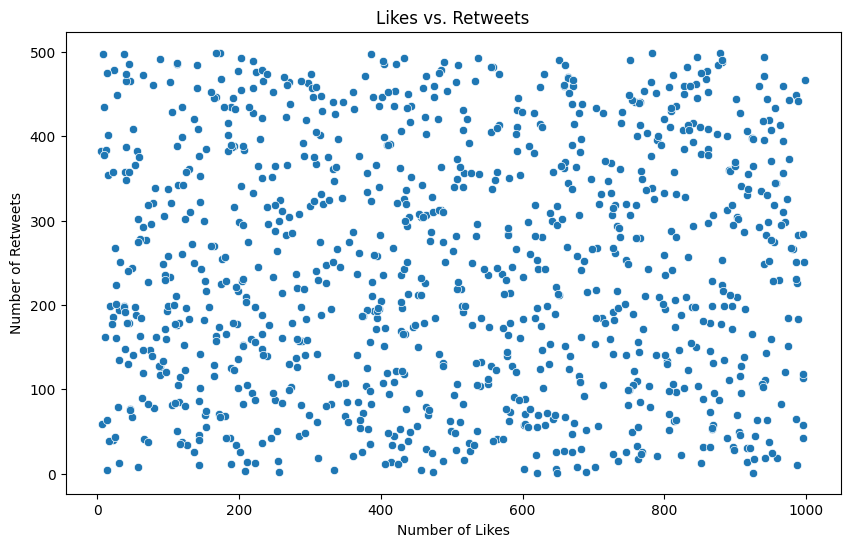

In [8]:
# Scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='likes', y='retweets', data=df)
plt.title('Likes vs. Retweets')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.show()


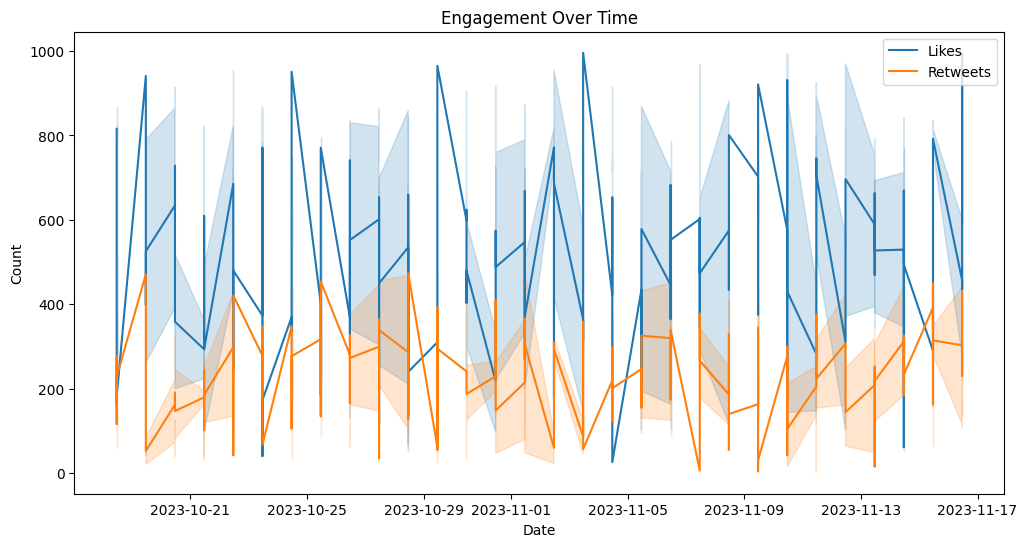

In [9]:
# Line plot for engagement over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='likes', data=df, label='Likes')
sns.lineplot(x='date', y='retweets', data=df, label='Retweets')
plt.title('Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


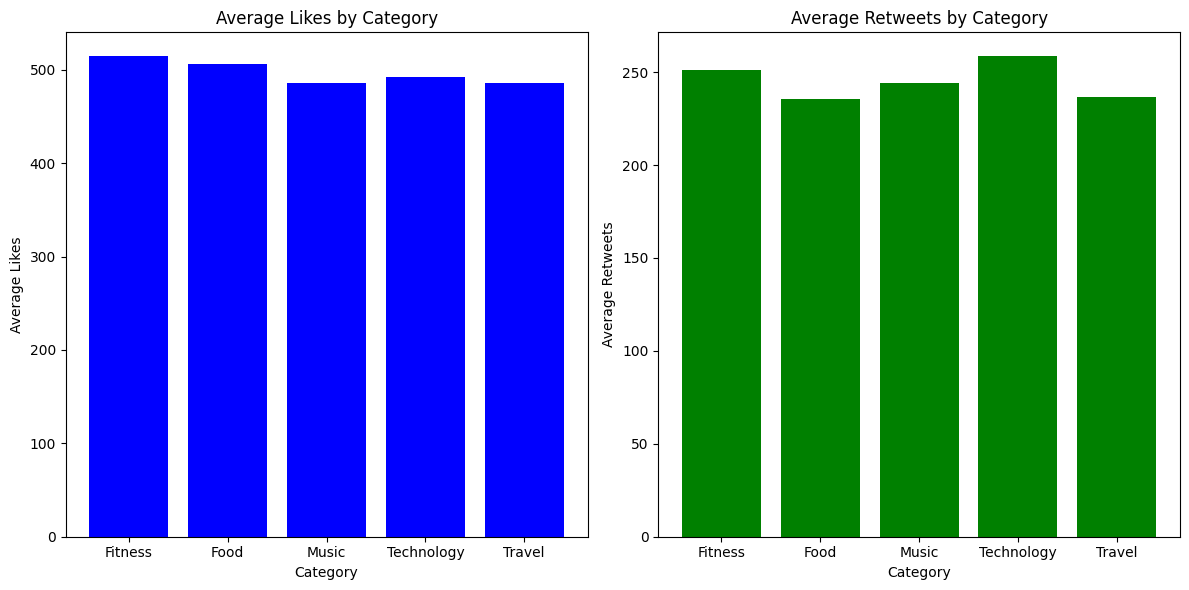

In [10]:
# Group by category and calculate average likes and retweets
category_analysis = df.groupby('category').agg({'likes': 'mean', 'retweets': 'mean'}).reset_index()

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot for average likes
plt.subplot(1, 2, 1)
plt.bar(category_analysis['category'], category_analysis['likes'], color='blue')
plt.title('Average Likes by Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')

# Bar plot for average retweets
plt.subplot(1, 2, 2)
plt.bar(category_analysis['category'], category_analysis['retweets'], color='green')
plt.title('Average Retweets by Category')
plt.xlabel('Category')
plt.ylabel('Average Retweets')

plt.tight_layout()
plt.show()


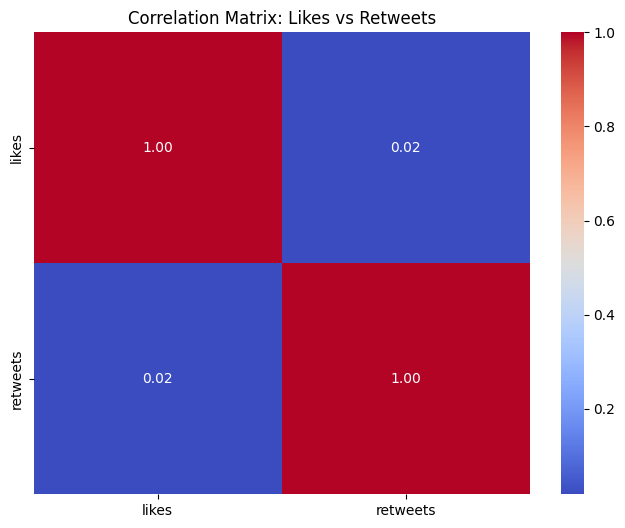

In [11]:

# Calculate correlation
correlation = df[['likes', 'retweets']].corr()

# Visualize the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Likes vs Retweets')
plt.show()


day_of_week
Wednesday    174
Thursday     155
Sunday       147
Saturday     141
Friday       135
Tuesday      129
Monday       119
Name: count, dtype: int64
hour
11    1000
Name: count, dtype: int64


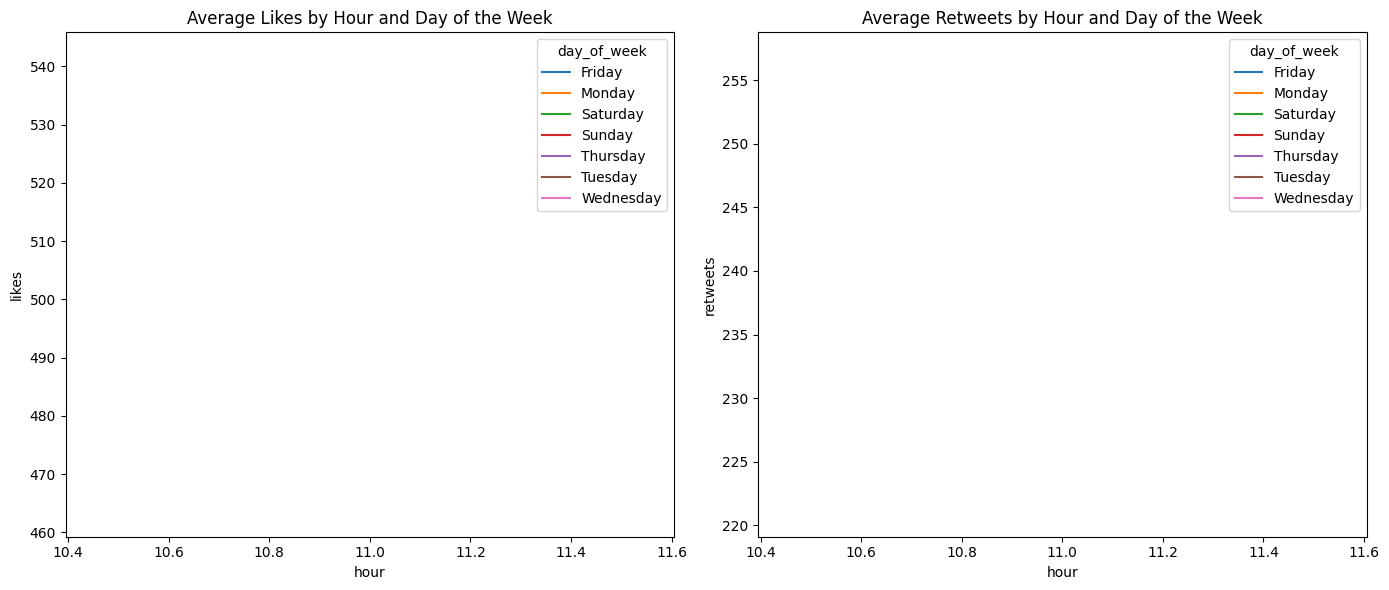

In [14]:
# Check data distribution
print(df['day_of_week'].value_counts())
print(df['hour'].value_counts())

# Time-based Analysis
time_analysis = df.groupby(['day_of_week', 'hour']).agg({'likes': 'mean', 'retweets': 'mean'}).reset_index()

# Visualize the results
plt.figure(figsize=(14, 6))

# Line plot for average likes by day of the week
plt.subplot(1, 2, 1)
sns.lineplot(x='hour', y='likes', hue='day_of_week', data=time_analysis)
plt.title('Average Likes by Hour and Day of the Week')

# Line plot for average retweets by day of the week
plt.subplot(1, 2, 2)
sns.lineplot(x='hour', y='retweets', hue='day_of_week', data=time_analysis)
plt.title('Average Retweets by Hour and Day of the Week')

plt.tight_layout()
plt.show()


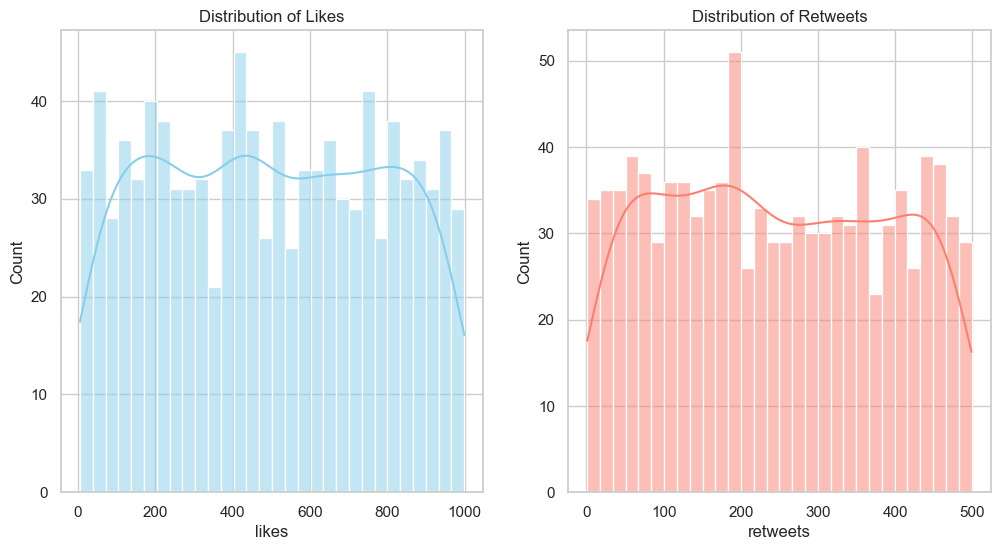

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of likes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['likes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Likes')

# Plot the distribution of retweets
plt.subplot(1, 2, 2)
sns.histplot(df['retweets'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Retweets')

plt.show()


In [13]:
# Identify top tweets with the highest likes and retweets
top_likes = df.nlargest(5, 'likes')
top_retweets = df.nlargest(5, 'retweets')

# Display the results
print('Top Tweets by Likes:')
print(top_likes[['category', 'likes', 'retweets', 'date']])

print('\nTop Tweets by Retweets:')
print(top_retweets[['category', 'likes', 'retweets', 'date']])


Top Tweets by Likes:
       category  likes  retweets                       date
191  Technology    999       467 2023-11-04 11:18:46.042704
196       Music    997       251 2023-11-02 11:18:46.042704
561       Music    996       113 2023-11-10 11:18:46.044707
791     Fitness    996       118 2023-10-19 11:18:46.045917
950      Travel    996        57 2023-11-03 11:18:46.046927

Top Tweets by Retweets:
       category  likes  retweets                       date
432      Travel    173       499 2023-11-10 11:18:46.043703
521  Technology    167       499 2023-11-07 11:18:46.043703
619     Fitness    878       499 2023-11-08 11:18:46.044707
986      Travel    782       499 2023-10-23 11:18:46.046927
281     Fitness      8       498 2023-11-14 11:18:46.042704


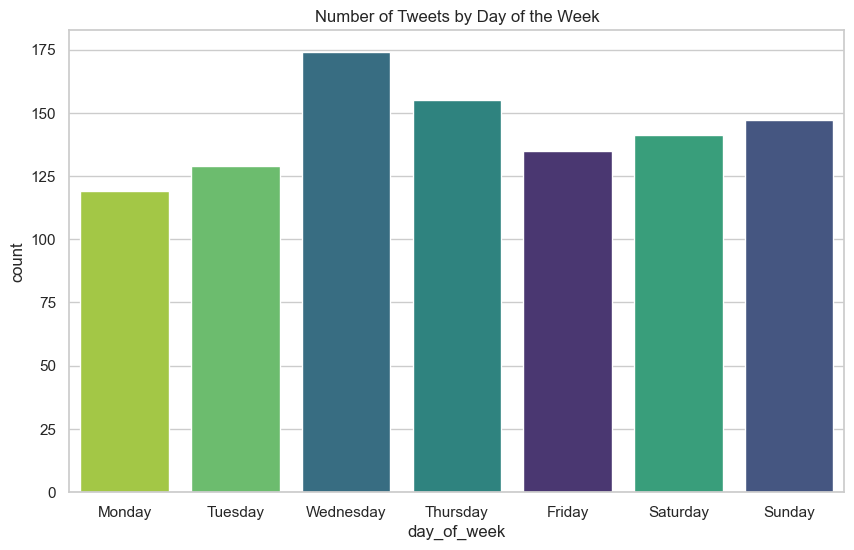

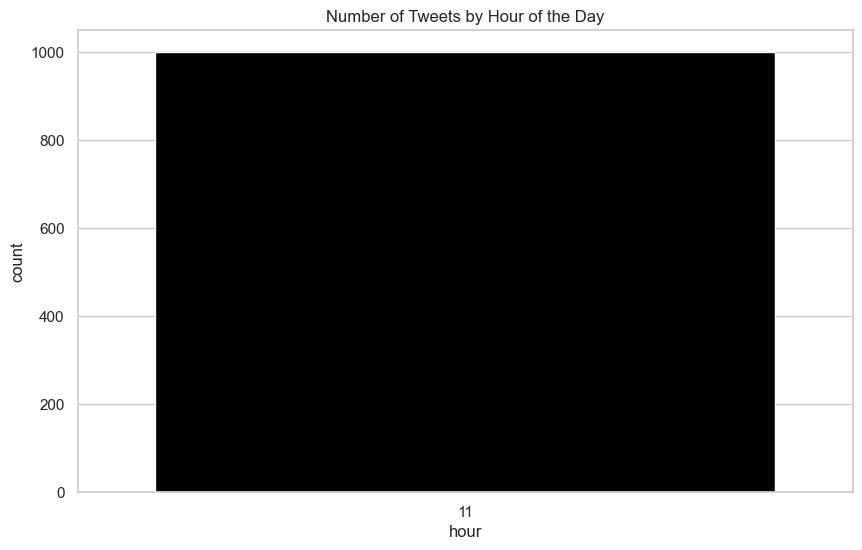

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the loaded Twitter data

# 1. Convert 'date' to Datetime
df['date'] = pd.to_datetime(df['date'])

# 2. Create 'day_of_week' and 'hour' Columns
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# 3. Count and Plot Day of the Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = df['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=day_order, palette='viridis', hue='day_of_week', legend=False)
plt.title('Number of Tweets by Day of the Week')
plt.show()

# 4. Count and Plot Hour of the Day
hour_order = sorted(df['hour'].unique())
hour_counts = df['hour'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, order=hour_order, palette='magma', hue='hour', legend=False)
plt.title('Number of Tweets by Hour of the Day')
plt.show()
